Load the model

In [1]:
import os

from fastai.vision.all import *
from fastai.vision import *

import pandas as pd

In [2]:
DATASET_PATH = '/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages'
DATASET_PATH_Train = '/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Train_Color'
DATASET_PATH_Val = '/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Val_Color'
DATASET_PATH_Test = '/media/ryan/New Volume/datasets/kagglecatsanddogs_5340/PetImages/Test_Color'

In [3]:
dls = ImageDataLoaders.from_folder(
    path=DATASET_PATH,
    train = 'Train_Color',
    valid = 'Val_Color',
    test = 'Test_Color',
    item_tfms=Resize(224),
    bs=16,
    batch_tfms=[Normalize.from_stats(*imagenet_stats), RandTransform()],
    device = 'cuda'
)

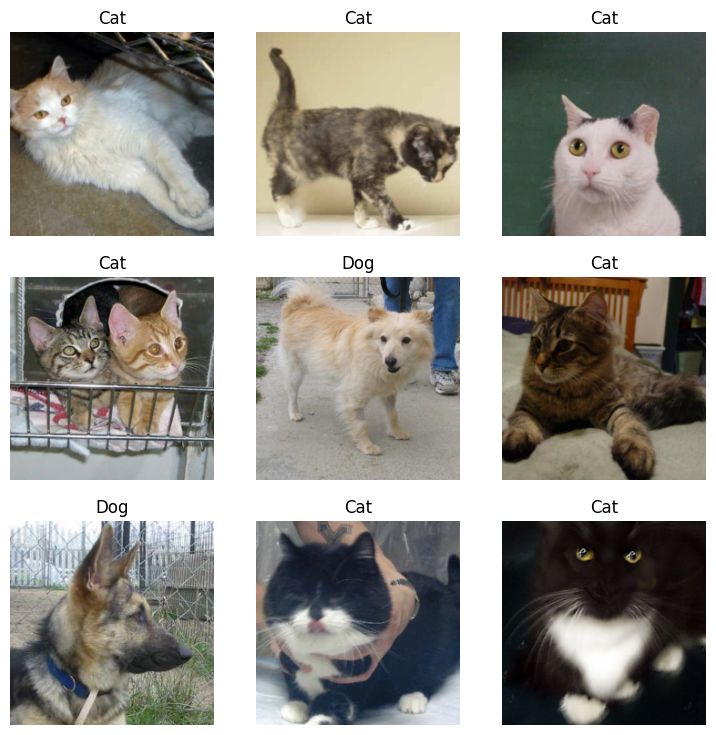

In [4]:
dls.show_batch()

In [5]:
new_model = load_learner(f'{DATASET_PATH}/catdog_color_classifier_1.pkl')

In [6]:
val_results = new_model.validate(dl=dls.valid)
print("Validation set results:")
print(f" - Loss: {val_results[0]}")
print(f" - Accuracy: {val_results[1]}")

Validation set results:
 - Loss: 0.01932658441364765
 - Accuracy: 0.9934967756271362


In [7]:
train_results = new_model.validate(dl=dls.train)
print("Train set results:")
print(f" - Loss: {train_results[0]}")
print(f" - Accuracy: {train_results[1]}")

/home/ryan/anaconda3/envs/catdog/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:890: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Train set results:
 - Loss: 0.013496930710971355
 - Accuracy: 0.9956331849098206


In [8]:
dls_test = ImageDataLoaders.from_folder(
    path=DATASET_PATH,
    train = 'Train_Color',
    valid = 'Test_Color',
    item_tfms=Resize(224),
    bs=16,
    batch_tfms=[Normalize.from_stats(*imagenet_stats), RandTransform()],
    device = 'cuda'
)

In [9]:
test_results = new_model.validate(dl=dls_test.valid)
print("Test set results:")
print(f" - Loss: {test_results[0]}")
print(f" - Accuracy: {test_results[1]}")

Test set results:
 - Loss: 0.012978407554328442
 - Accuracy: 0.9940000176429749
